# Python Data Structures

# Pandas

Pandas is a popular Python library that is highly optimized for performance, with critical code paths written in Cython or C. The core feature is a fast and efficient DataFrame object, two dimensional structure consisting of rows and columns.  Each column is an object known as a Series, a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.  Both DataFrames and Series support a number of methods for data manipulation with integrated indexing.

DataFrames support:
- intelligent label-based slicing, 
- fancy indexing, 
- subsetting of large data sets
- mutability Columns can be inserted and deleted
- Aggregation with a powerful group by engine allowing split-apply-combine operations on data sets.
- High performance merging and joining of data sets;
- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;

Time series-functionality includes: 
- date range generation and frequency conversion, 
- moving window statistics, moving window linear regressions, 
- date shifting and lagging. 


Pandas prodides tools for reading and writing data between in-memory data structures and different formats, including: 
- CSV and text files, 
- Microsoft Excel, 
- SQL databases, 
- and the fast HDF5 format;

Customarily, we import as follows:

In [12]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## Object Creation

See the Data Structure Intro section.

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [13]:
s = pd.Series([1,3,5,np.nan,6,8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [14]:
dates = pd.date_range('20130101', periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.471719,-0.658487,-0.812044,0.422946
2013-01-02,-0.105299,1.251760,-0.098425,0.279609
2013-01-03,-3.142871,-0.950979,-0.235923,0.800755
2013-01-04,-0.125113,-0.121613,0.477007,-0.201026
2013-01-05,0.215353,-0.741696,2.116206,-1.179076
2013-01-06,1.875213,-0.920542,-0.704933,-1.345560


Creating a DataFrame by passing a dict of objects that can be converted to series-like

In [16]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [17]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

```
In [13]: df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D
```

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.
Viewing Data

Here is how to view the top and bottom rows of the frame:

In [18]:
df.head()

,A,B,C,D
2013-01-01,0.471719,-0.658487,-0.812044,0.422946
2013-01-02,-0.105299,1.251760,-0.098425,0.279609
2013-01-03,-3.142871,-0.950979,-0.235923,0.800755
2013-01-04,-0.125113,-0.121613,0.477007,-0.201026
2013-01-05,0.215353,-0.741696,2.116206,-1.179076


In [19]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.125113,-0.121613,0.477007,-0.201026
2013-01-05,0.215353,-0.741696,2.116206,-1.179076
2013-01-06,1.875213,-0.920542,-0.704933,-1.345560


Display the index, columns, and the underlying NumPy data:

In [20]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [23]:
df.values

array([[ 0.47171861, -0.65848734, -0.81204426,  0.42294572],
       [-0.10529856,  1.25176047, -0.09842463,  0.2796087 ],
       [-3.14287141, -0.95097867, -0.23592339,  0.80075508],
       [-0.12511313, -0.12161275,  0.47700673, -0.20102641],
       [ 0.21535288, -0.74169633,  2.11620608, -1.17907563],
       [ 1.87521251, -0.92054231, -0.70493335, -1.34556047]])

describe() shows a quick statistic summary of your data:

In [24]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.135167,-0.356926,0.123648,-0.203726
std,1.648034,0.842946,1.080354,0.882090
min,-3.142871,-0.950979,-0.812044,-1.345560
25%,-0.120159,-0.875831,-0.587681,-0.934563
50%,0.055027,-0.700092,-0.167174,0.039291
75%,0.407627,-0.255831,0.333149,0.387111
max,1.875213,1.251760,2.116206,0.800755


### Transposing your data:

In [25]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.471719,-0.105299,-3.142871,-0.125113,0.215353,1.875213
B,-0.658487,1.251760,-0.950979,-0.121613,-0.741696,-0.920542
C,-0.812044,-0.098425,-0.235923,0.477007,2.116206,-0.704933
D,0.422946,0.279609,0.800755,-0.201026,-1.179076,-1.345560


### Sorting by an axis:

In [26]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.422946,-0.812044,-0.658487,0.471719
2013-01-02,0.279609,-0.098425,1.251760,-0.105299
2013-01-03,0.800755,-0.235923,-0.950979,-3.142871
2013-01-04,-0.201026,0.477007,-0.121613,-0.125113
2013-01-05,-1.179076,2.116206,-0.741696,0.215353
2013-01-06,-1.345560,-0.704933,-0.920542,1.875213


### Sorting by values:

In [27]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-3.142871,-0.950979,-0.235923,0.800755
2013-01-06,1.875213,-0.920542,-0.704933,-1.345560
2013-01-05,0.215353,-0.741696,2.116206,-1.179076
2013-01-01,0.471719,-0.658487,-0.812044,0.422946
2013-01-04,-0.125113,-0.121613,0.477007,-0.201026
2013-01-02,-0.105299,1.251760,-0.098425,0.279609


## Selection

Note

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.
Getting 
Selecting a single column, which yields a Series, equivalent to df.A:

In [28]:
df['A']

2013-01-01    0.471719
2013-01-02   -0.105299
2013-01-03   -3.142871
2013-01-04   -0.125113
2013-01-05    0.215353
2013-01-06    1.875213
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [29]:
df[0:3]

,A,B,C,D
2013-01-01,0.471719,-0.658487,-0.812044,0.422946
2013-01-02,-0.105299,1.251760,-0.098425,0.279609
2013-01-03,-3.142871,-0.950979,-0.235923,0.800755


In [30]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.105299,1.251760,-0.098425,0.279609
2013-01-03,-3.142871,-0.950979,-0.235923,0.800755
2013-01-04,-0.125113,-0.121613,0.477007,-0.201026


### Selection by Label

For getting a cross section using a label:

In [31]:
df.loc[dates[0]]

A    0.471719
B   -0.658487
C   -0.812044
D    0.422946
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [32]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.471719,-0.658487
2013-01-02,-0.105299,1.251760
2013-01-03,-3.142871,-0.950979
2013-01-04,-0.125113,-0.121613
2013-01-05,0.215353,-0.741696
2013-01-06,1.875213,-0.920542


Showing label slicing, both endpoints are included:

In [33]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.105299,1.251760
2013-01-03,-3.142871,-0.950979
2013-01-04,-0.125113,-0.121613


Reduction in the dimensions of the returned object:

In [34]:
df.loc['20130102',['A','B']]

A   -0.105299
B    1.251760
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [35]:
df.loc[dates[0],'A']

0.4717186078010165

For getting fast access to a scalar (equivalent to the prior method):

In [36]:
df.at[dates[0],'A']

0.4717186078010165

### Selection by Position


Select via the position of the passed integers:

In [37]:
df.iloc[3]

A   -0.125113
B   -0.121613
C    0.477007
D   -0.201026
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [38]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.125113,-0.121613
2013-01-05,0.215353,-0.741696


By lists of integer position locations, similar to the numpy/python style:

In [39]:
 df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.105299,-0.098425
2013-01-03,-3.142871,-0.235923
2013-01-05,0.215353,2.116206


For slicing rows explicitly:

In [40]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.105299,1.251760,-0.098425,0.279609
2013-01-03,-3.142871,-0.950979,-0.235923,0.800755


For slicing columns explicitly:

In [41]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.658487,-0.812044
2013-01-02,1.251760,-0.098425
2013-01-03,-0.950979,-0.235923
2013-01-04,-0.121613,0.477007
2013-01-05,-0.741696,2.116206
2013-01-06,-0.920542,-0.704933


For getting a value explicitly:

In [42]:
df.iloc[1,1]

1.2517604689086188

For getting fast access to a scalar (equivalent to the prior method):

In [43]:
df.iat[1,1]

1.2517604689086188

### Boolean Indexing

Using a single column’s values to select data.

In [44]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.471719,-0.658487,-0.812044,0.422946
2013-01-05,0.215353,-0.741696,2.116206,-1.179076
2013-01-06,1.875213,-0.920542,-0.704933,-1.345560


Selecting values from a DataFrame where a boolean condition is met.

In [45]:
df[df > 0]

,A,B,C,D
2013-01-01,0.471719,NaN,NaN,0.422946
2013-01-02,NaN,1.25176,NaN,0.279609
2013-01-03,NaN,NaN,NaN,0.800755
2013-01-04,NaN,NaN,0.477007,NaN
2013-01-05,0.215353,NaN,2.116206,NaN
2013-01-06,1.875213,NaN,NaN,NaN


Using the isin() method for filtering:

df2 = df.copy()

In [49]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [51]:
df2['E'] = ['one', 'one','two','three']

In [73]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.812044,-5,NaN
2013-01-02,-0.105299,-1.251760,-0.098425,-5,-1.0
2013-01-03,-3.142871,-0.950979,-0.235923,-5,-2.0
2013-01-04,-0.125113,-0.121613,-0.477007,-5,-3.0
2013-01-05,-0.215353,-0.741696,-2.116206,-5,-4.0
2013-01-06,-1.875213,-0.920542,-0.704933,-5,-5.0


In [52]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,two,foo


## Setting

Setting a new column automatically aligns the data by the indexes.

In [53]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [54]:
df['F'] = s1

### Setting values by label:

In [55]:
df.at[dates[0],'A'] = 0

### Setting values by position:

In [56]:
df.iat[0,1] = 0

Setting by assigning with a NumPy array:

In [57]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [58]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.812044,5,NaN
2013-01-02,-0.105299,1.251760,-0.098425,5,1.0
2013-01-03,-3.142871,-0.950979,-0.235923,5,2.0
2013-01-04,-0.125113,-0.121613,0.477007,5,3.0
2013-01-05,0.215353,-0.741696,2.116206,5,4.0
2013-01-06,1.875213,-0.920542,-0.704933,5,5.0


A where operation with setting.

In [59]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.812044,-5,NaN
2013-01-02,-0.105299,-1.251760,-0.098425,-5,-1.0
2013-01-03,-3.142871,-0.950979,-0.235923,-5,-2.0
2013-01-04,-0.125113,-0.121613,-0.477007,-5,-3.0
2013-01-05,-0.215353,-0.741696,-2.116206,-5,-4.0
2013-01-06,-1.875213,-0.920542,-0.704933,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [60]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.812044,5,NaN,1.0
2013-01-02,-0.105299,1.251760,-0.098425,5,1.0,1.0
2013-01-03,-3.142871,-0.950979,-0.235923,5,2.0,NaN
2013-01-04,-0.125113,-0.121613,0.477007,5,3.0,NaN


To drop any rows that have missing data.

In [61]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.105299,1.25176,-0.098425,5,1.0,1.0


Filling missing data.

In [62]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.812044,5,5.0,1.0
2013-01-02,-0.105299,1.251760,-0.098425,5,1.0,1.0
2013-01-03,-3.142871,-0.950979,-0.235923,5,2.0,5.0
2013-01-04,-0.125113,-0.121613,0.477007,5,3.0,5.0


To get the boolean mask where values are nan.

In [63]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the Basic section on Binary Ops.
Stats

Operations in general exclude missing data.

Performing a descriptive statistic:

In [64]:
df.mean()

A   -0.213786
B   -0.247178
C    0.123648
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [65]:
df.mean(1)

2013-01-01    1.046989
2013-01-02    1.409607
2013-01-03    0.534045
2013-01-04    1.646056
2013-01-05    2.117973
2013-01-06    2.049947
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [66]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-4.142871,-1.950979,-1.235923,4.0,1.0
2013-01-04,-3.125113,-3.121613,-2.522993,2.0,0.0
2013-01-05,-4.784647,-5.741696,-2.883794,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data:

In [68]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.812044,5,NaN
2013-01-02,-0.105299,1.251760,-0.910469,10,1.0
2013-01-03,-3.248170,0.300782,-1.146392,15,3.0
2013-01-04,-3.373283,0.179169,-0.669386,20,6.0
2013-01-05,-3.157930,-0.562527,1.446821,25,10.0
2013-01-06,-1.282718,-1.483070,0.741887,30,15.0


In [69]:
df.apply(lambda x: x.max() - x.min())

A    5.018084
B    2.202739
C    2.928250
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [70]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    6
2    0
3    5
4    1
5    3
6    2
7    2
8    4
9    1
dtype: int64

In [71]:
In [70]: s.value_counts()

2    2
1    2
0    2
6    1
5    1
4    1
3    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [72]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat():

In [74]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.857423,0.260207,-0.280796,-0.427363
1,-0.974109,0.865448,0.279653,-1.343845
2,-0.336414,0.145369,0.566719,1.018185
3,-0.461144,1.843030,1.726669,-0.361532
4,-0.162163,1.605066,-0.446539,1.288113
5,-1.044529,-0.128524,1.114113,-0.567984
6,-0.072830,-1.420295,0.692718,-0.570232
7,-1.723383,-1.382363,0.734093,0.343123
8,0.602856,0.003548,-0.549132,-0.730598
9,0.253597,0.177849,0.652049,-0.304386


## break it into pieces

In [75]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.857423,0.260207,-0.280796,-0.427363
1,-0.974109,0.865448,0.279653,-1.343845
2,-0.336414,0.145369,0.566719,1.018185
3,-0.461144,1.843030,1.726669,-0.361532
4,-0.162163,1.605066,-0.446539,1.288113
5,-1.044529,-0.128524,1.114113,-0.567984
6,-0.072830,-1.420295,0.692718,-0.570232
7,-1.723383,-1.382363,0.734093,0.343123
8,0.602856,0.003548,-0.549132,-0.730598
9,0.253597,0.177849,0.652049,-0.304386


## Join

SQL style merges. See the Database style joining section.

In [76]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [77]:
right

,key,rval
0,foo,4
1,foo,5


In [78]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [80]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [81]:
right

,key,rval
0,foo,4
1,bar,5


In [82]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append

Append rows to a dataframe. See the Appending section.

In [83]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.887188,-1.399441,1.515228,-1.048686
1,1.293618,1.089474,-1.099636,0.470248
2,-0.224071,1.034556,0.670833,0.162860
3,1.349086,1.527886,-1.448368,-0.545721
4,1.183148,-0.101699,0.445418,0.925493
5,-1.803510,-1.361377,0.861406,0.515501
6,-0.614579,0.465464,-0.313024,-0.682315
7,0.744155,0.261085,1.183050,-1.036235


In [84]:
s = df.iloc[3]

In [85]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.887188,-1.399441,1.515228,-1.048686
1,1.293618,1.089474,-1.099636,0.470248
2,-0.224071,1.034556,0.670833,0.162860
3,1.349086,1.527886,-1.448368,-0.545721
4,1.183148,-0.101699,0.445418,0.925493
5,-1.803510,-1.361377,0.861406,0.515501
6,-0.614579,0.465464,-0.313024,-0.682315
7,0.744155,0.261085,1.183050,-1.036235
8,1.349086,1.527886,-1.448368,-0.545721


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

 - Splitting the data into groups based on some criteria
 - Applying a function to each group independently
 - Combining the results into a data structure

In [86]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
 

df

,A,B,C,D
0,foo,one,2.436660,-0.063232
1,bar,one,-0.740089,0.122598
2,foo,two,0.582913,-1.089665
3,bar,three,-0.235097,-0.630245
4,foo,two,-2.513711,-0.103801
5,bar,two,-0.454750,-0.429573
6,foo,one,-0.641992,2.076626
7,foo,three,1.774487,-0.461503


Grouping and then applying the sum() function to the resulting groups.

In [87]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.429936,-0.937220
foo,1.638357,0.358426


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [88]:
 df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.740089  0.122598
    three -0.235097 -0.630245
    two   -0.454750 -0.429573
foo one    1.794668  2.013394
    three  1.774487 -0.461503
    two   -1.930798 -1.193465

## Reshaping

In [89]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
 

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.042384 -0.525757
      two    -0.743824 -0.136037
baz   one    -1.012162  0.482965
      two    -0.580965 -1.101708

The stack() method “compresses” a level in the DataFrame’s columns.

In [90]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.042384
               B   -0.525757
       two     A   -0.743824
               B   -0.136037
baz    one     A   -1.012162
               B    0.482965
       two     A   -0.580965
               B   -1.101708
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [91]:
stacked.unstack()

A         B
first second                    
bar   one    -1.042384 -0.525757
      two    -0.743824 -0.136037
baz   one    -1.012162  0.482965
      two    -0.580965 -1.101708

In [92]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.042384 -0.743824
      B -0.525757 -0.136037
baz   A -1.012162 -0.580965
      B  0.482965 -1.101708

In [93]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.042384 -1.012162
       B -0.525757  0.482965
two    A -0.743824 -0.580965
       B -0.136037 -1.101708

## Pivot Tables

In [95]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
 

df

,A,B,C,D,E
0,one,A,foo,-0.093189,1.273916
1,one,B,foo,0.610286,1.756443
2,two,C,foo,-0.466229,-1.597012
3,three,A,bar,-0.116699,-1.307329
4,one,B,bar,0.614172,1.045888
5,one,C,bar,-0.011136,-1.125230
6,two,A,foo,0.482067,0.300309
7,three,B,foo,-0.510743,0.624620
8,one,C,foo,0.365827,0.238395
9,one,A,bar,-1.418566,0.382836


We can produce pivot tables from this data very easily:

In [96]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.418566 -0.093189
      B  0.614172  0.610286
      C -0.011136  0.365827
three A -0.116699       NaN
      B       NaN -0.510743
      C  0.797888       NaN
two   A       NaN  0.482067
      B  1.293642       NaN
      C       NaN -0.466229

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [97]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24843
Freq: 5T, dtype: int64

### Time zone representation:

In [98]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.586550
2012-03-07    1.319864
2012-03-08   -0.980343
2012-03-09    0.645912
2012-03-10    1.049370
Freq: D, dtype: float64

In [99]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.586550
2012-03-07 00:00:00+00:00    1.319864
2012-03-08 00:00:00+00:00   -0.980343
2012-03-09 00:00:00+00:00    0.645912
2012-03-10 00:00:00+00:00    1.049370
Freq: D, dtype: float64

### Converting to another time zone:

In [102]:
ts_utc.tz_convert('Africa/Johannesburg')

2012-03-06 02:00:00+02:00    0.586550
2012-03-07 02:00:00+02:00    1.319864
2012-03-08 02:00:00+02:00   -0.980343
2012-03-09 02:00:00+02:00    0.645912
2012-03-10 02:00:00+02:00    1.049370
Freq: D, dtype: float64

### Converting between time span representations:

In [101]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.542389
2012-02-29   -1.054644
2012-03-31   -0.230015
2012-04-30    0.815788
2012-05-31    0.999007
Freq: M, dtype: float64

In [103]:
ps = ts.to_period()
ps

2012-01    0.542389
2012-02   -1.054644
2012-03   -0.230015
2012-04    0.815788
2012-05    0.999007
Freq: M, dtype: float64

In [104]:
ps.to_timestamp()

2012-01-01    0.542389
2012-02-01   -1.054644
2012-03-01   -0.230015
2012-04-01    0.815788
2012-05-01    0.999007
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [105]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.232586
1990-06-01 09:00    2.169025
1990-09-01 09:00    1.509867
1990-12-01 09:00   -0.267898
1991-03-01 09:00    0.828603
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [106]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [107]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [108]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [109]:
In [131]: df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [110]:
In [132]: df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [111]:
In [133]: df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [4]:
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
    Sort by the values along either axis
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels
    
                .. versionchanged:: 0.23.0
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default Fa

Grouping by a categorical column also shows empty categories.

In [112]:
df.groupby("grade").size() 

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting


See Matplotlib laters.

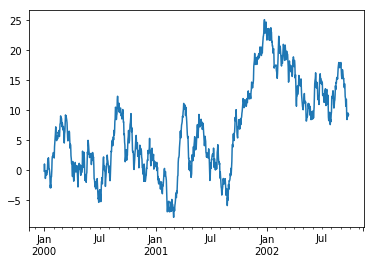

In [113]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

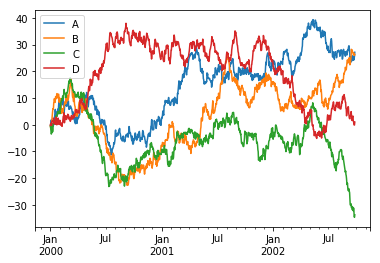

In [114]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## File IO
### Writing to a csv file.

In [115]:
df.to_csv('foo.csv')

### Reading from a csv file.

In [117]:
pd.read_csv('foo.csv')[:10]

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.139193,-0.256604,-0.668059,-0.193471
1,2000-01-02,-0.036012,-1.478668,-1.156785,0.553111
2,2000-01-03,1.018527,-1.725860,-2.595472,0.453527
3,2000-01-04,1.830419,-0.356388,-3.489896,-0.027655
4,2000-01-05,-0.060430,1.111570,-3.044518,-0.258616
5,2000-01-06,0.192691,2.687339,-2.213828,1.204963
6,2000-01-07,-0.052127,3.784272,-0.541535,1.455004
7,2000-01-08,-0.582586,4.720791,-2.689966,1.334560
8,2000-01-09,0.325470,5.959106,-1.917177,1.430612
9,2000-01-10,-0.645432,5.798531,0.457090,1.359623


### HDF5

Reading and writing to HDFStores.

### Writing to a HDF5 Store.

In [118]:
df.to_hdf('foo.h5','df')

### Reading from a HDF5 Store.

In [119]:
pd.read_hdf('foo.h5','df')[:10]

,A,B,C,D
2000-01-01,-0.139193,-0.256604,-0.668059,-0.193471
2000-01-02,-0.036012,-1.478668,-1.156785,0.553111
2000-01-03,1.018527,-1.725860,-2.595472,0.453527
2000-01-04,1.830419,-0.356388,-3.489896,-0.027655
2000-01-05,-0.060430,1.111570,-3.044518,-0.258616
2000-01-06,0.192691,2.687339,-2.213828,1.204963
2000-01-07,-0.052127,3.784272,-0.541535,1.455004
2000-01-08,-0.582586,4.720791,-2.689966,1.334560
2000-01-09,0.325470,5.959106,-1.917177,1.430612
2000-01-10,-0.645432,5.798531,0.457090,1.359623


## Excel

Reading and writing to MS Excel.

### Writing to an excel file.

In [120]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

### Reading from an excel file.

In [122]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])[:10]

,A,B,C,D
2000-01-01,-0.139193,-0.256604,-0.668059,-0.193471
2000-01-02,-0.036012,-1.478668,-1.156785,0.553111
2000-01-03,1.018527,-1.725860,-2.595472,0.453527
2000-01-04,1.830419,-0.356388,-3.489896,-0.027655
2000-01-05,-0.060430,1.111570,-3.044518,-0.258616
2000-01-06,0.192691,2.687339,-2.213828,1.204963
2000-01-07,-0.052127,3.784272,-0.541535,1.455004
2000-01-08,-0.582586,4.720791,-2.689966,1.334560
2000-01-09,0.325470,5.959106,-1.917177,1.430612
2000-01-10,-0.645432,5.798531,0.457090,1.359623


## Gotchas

If you are attempting to perform an operation you might see an exception like:

In [123]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().